In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt 

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [5]:
df['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [6]:
df.drop(columns=['adult_male', 'who', 'class', 'alone', 'embarked', 'alive'], inplace=True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,deck,embark_town
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C,Cherbourg
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,C,Southampton
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton


In [8]:
df.shape

(891, 9)

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
deck           688
embark_town      2
dtype: int64

In [10]:
df.drop(columns='deck',inplace=True)

In [11]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town'],
      dtype='object')

In [12]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      2
dtype: int64

<Axes: ylabel='age'>

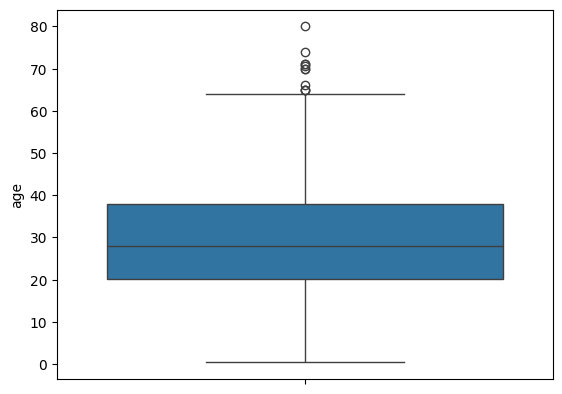

In [13]:
sns.boxplot(df['age'])

In [14]:
median = df['age'].median()

In [15]:
df['age']=df['age'].fillna(median)

In [16]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    2
dtype: int64

In [17]:
mode = df['embark_town'].mode()[0]
df['embark_town']=df['embark_town'].fillna(mode)

In [18]:
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embark_town    0
dtype: int64

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


<Axes: ylabel='fare'>

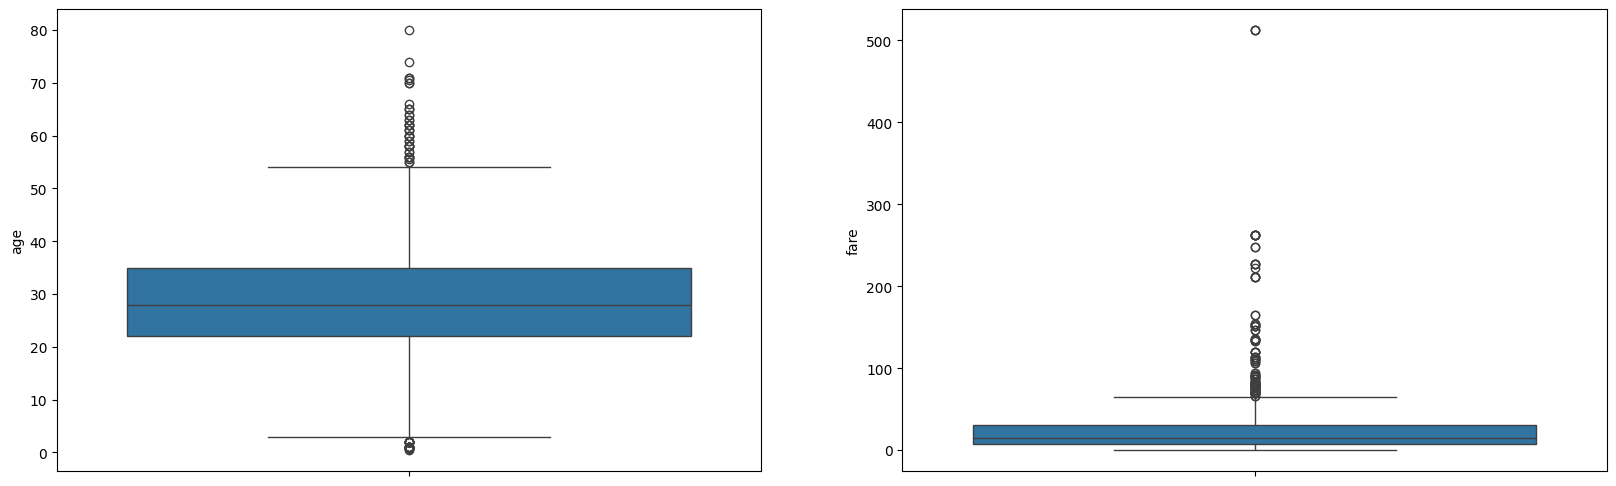

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.boxplot(df['age'])

plt.subplot(1,2,2)
sns.boxplot(df['fare'])

In [21]:
q1 = df.describe()['age']['25%']
q3 = df.describe()['age']['75%']
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [22]:
df['age']=df['age'].clip(lower_limit,upper_limit)

In [23]:
q1 = df.describe()['fare']['25%']
q3 = df.describe()['fare']['75%']
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
df['fare']=df['fare'].clip(lower_limit,upper_limit)

<Axes: ylabel='age'>

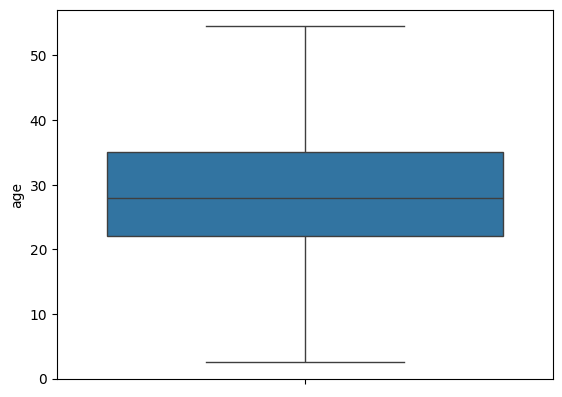

In [24]:
sns.boxplot(df['age'])

<Axes: ylabel='fare'>

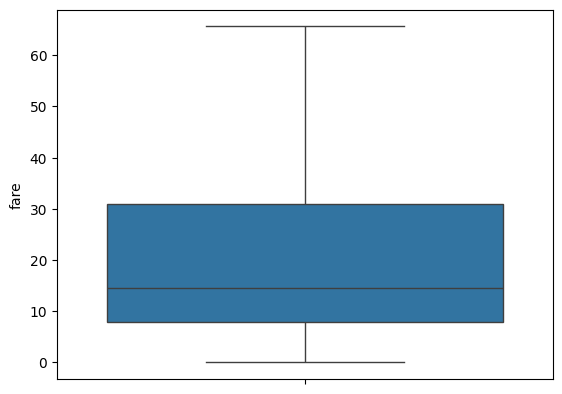

In [25]:
sns.boxplot(df['fare'])

In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,65.6344,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


In [27]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [28]:
df['embark_town'].value_counts()

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [29]:
d = {'male':1, 'female': 0}
df['sex']=df['sex'].map(d)

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,1,22.0,1,0,7.2500,Southampton
1,1,1,0,38.0,1,0,65.6344,Cherbourg
2,1,3,0,26.0,0,0,7.9250,Southampton
3,1,1,0,35.0,1,0,53.1000,Southampton
4,0,3,1,35.0,0,0,8.0500,Southampton


In [31]:
df = pd.get_dummies(df,columns=['embark_town'], drop_first=True,dtype='int64')

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,65.6344,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [33]:
X = df.drop(columns='survived')
y = df['survived']

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred=dt.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7877094972067039

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [39]:
y_pred=rf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8156424581005587

In [41]:
%%capture
pip install xgboost

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
# Model prediction
y_pred=xgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8044692737430168

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [44]:
y_pred=svc.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6703910614525139

In [46]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 32.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 34.9 MB/s eta 0:00:0000:01
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Note: you may need to restart the kernel to use updated packages.


In [47]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [48]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,65.6344,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [49]:
X.head(1)

,pclass,sex,age,sibsp,parch,fare,embark_town_Queenstown,embark_town_Southampton
0,3,1,22.0,1,0,7.25,0,1


In [50]:
def survival_predictor(pclass,sex,age,sibsp,parach,fare,embark_town_Queenstown,embark_town_Southampton):
    result = rf.predict([[pclass,sex,age,sibsp,parach,fare,embark_town_Queenstown,embark_town_Southampton]])
    if result==1:
        return "Survived" 
    else:
        return "Not Survived"

In [51]:
import gradio as gr

def survival_predictor(pclass,sex,age,sibsp,parach,fare,embark_town_Queenstown,embark_town_Southampton):
    result = rf.predict([[pclass,sex,age,sibsp,parach,fare,embark_town_Queenstown,embark_town_Southampton]])

    if result ==1:
        return "survived"
    else:
        return "Not survived"
    
demo = gr.Interface(
    fn=survival_predictor,
    inputs=["number", "number", "number", "number", "number", "number", "number", "number"],
    outputs=["text"],

)
demo.launch(share=True)

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://e42ec7438a051ed319.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
